# Step 5. Summary
- Purpose: 
    - For each frame, plot the head and the flagellum using different colors.
    - Plot the head in all frames into one figure.

In [1]:
from __future__ import print_function
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
def DisplayArray(array, title):
    plt.imshow(array, cmap='gray')
    plt.title(title)
    plt.show()
    return

## Step 5.1 Load the data.

In [3]:
sperm = sio.loadmat('../Movie/SpermInfo.mat')

In [4]:
# Get the size of the movie.
n1 = sperm['size'][0,0]
n2 = sperm['size'][0,1]
n3 = 20

In [5]:
# Get information in sperm.
Flagellum = sperm["flagellum"]
Frame = sperm["frames"]
Head = sperm["head"]

## 5.2 Plot the head and the flagellum separately.

In [6]:
newMovie = np.zeros( (n3,n2,n1) )
for k in range(n3):
    if k in Frame:
        # Loop in head.
        head = Head[0,k].astype(int)
        nh1,nh2 = head.shape
        for ii in range(nh1):
            newMovie[k, head[ii,0], head[ii,1] ] = 1
        # Loop in flagellum.
        flagellum = Flagellum[0,k].astype(int)
        nf1,nf2 = flagellum.shape
        for jj in range(nf1):
            newMovie[k, flagellum[jj,0], flagellum[jj,1] ] = 0.5
    # end of if ( k in Frame ) loop on
# end of for loop on k

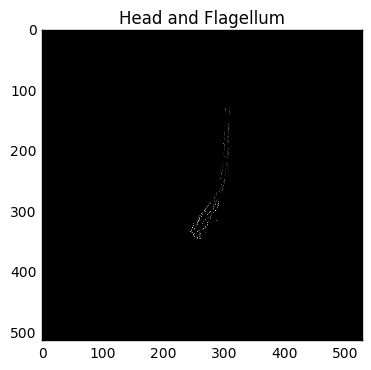

In [7]:
# Display one frame as an example.
DisplayArray(newMovie[0,:,:], 'Head and Flagellum')

This visualization is not legible. Try another visualization.

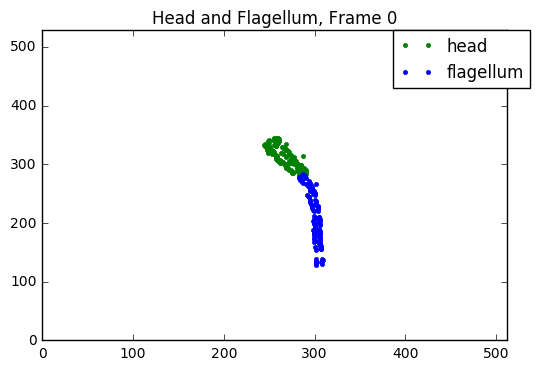

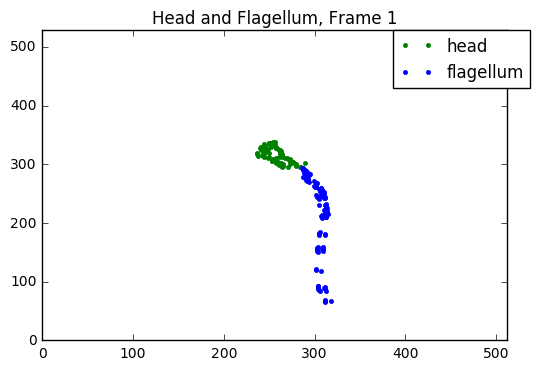

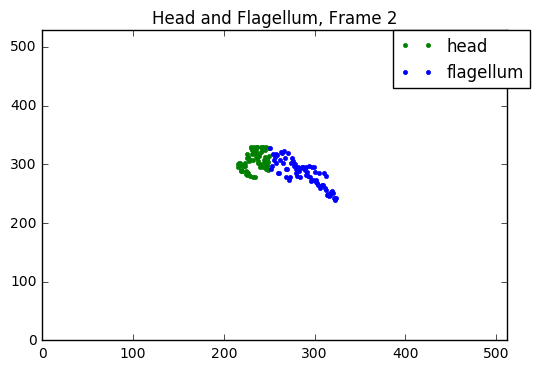

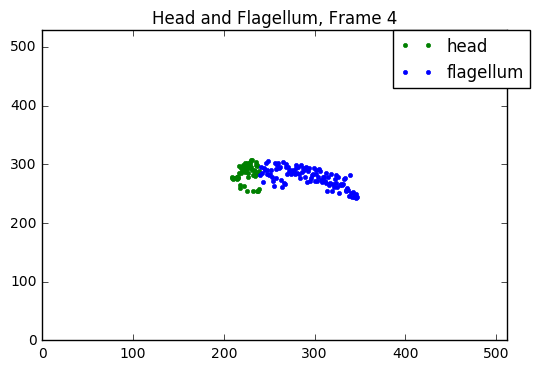

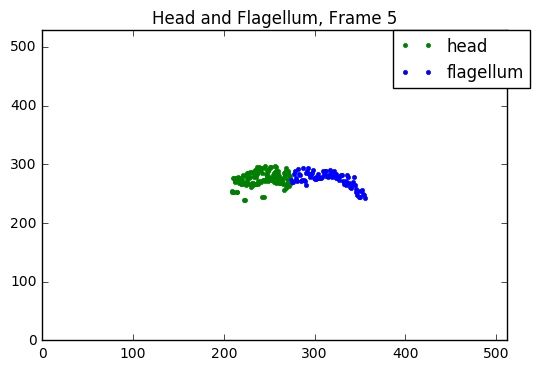

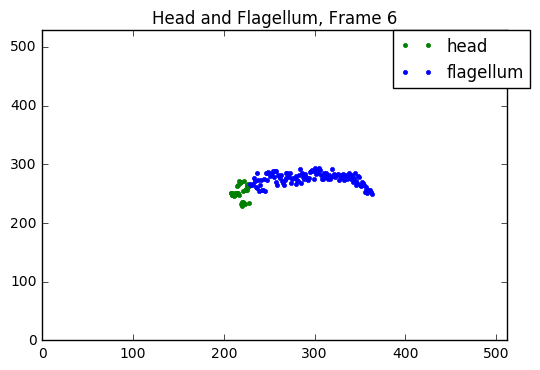

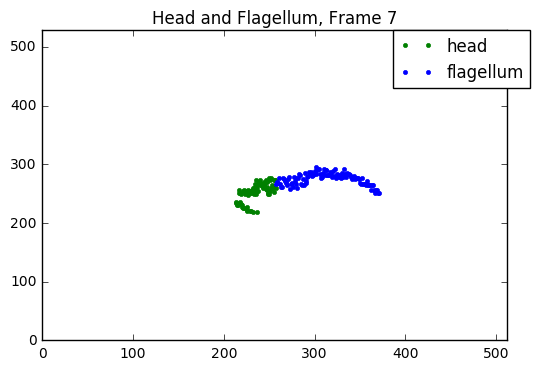

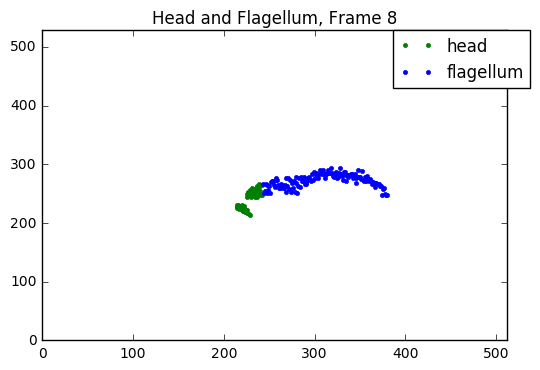

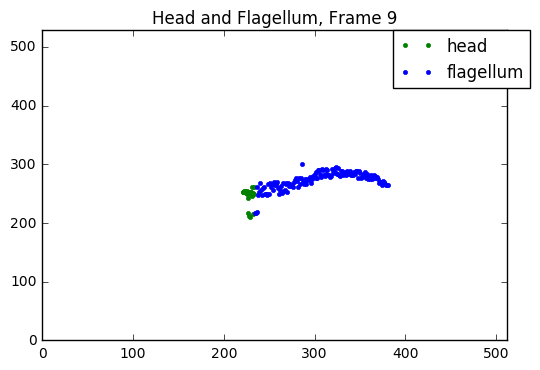

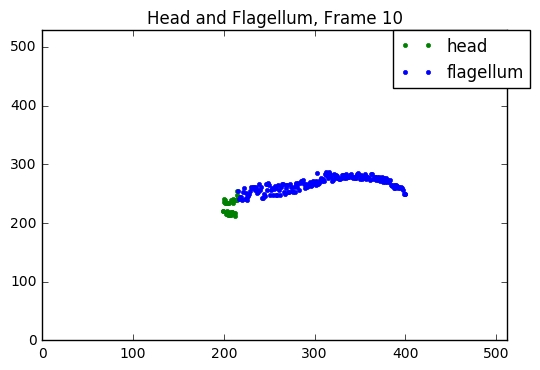

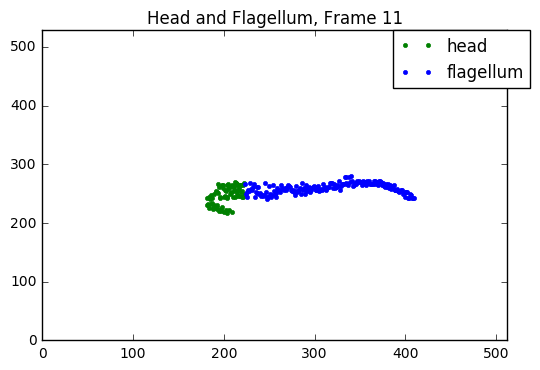

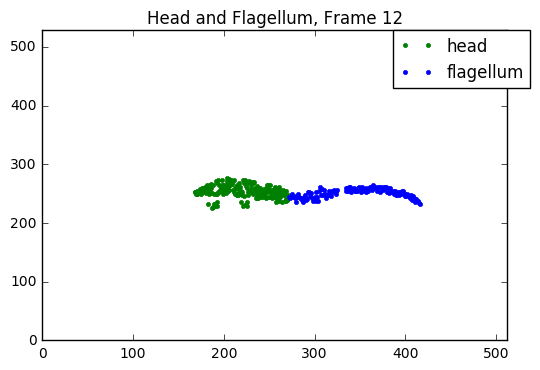

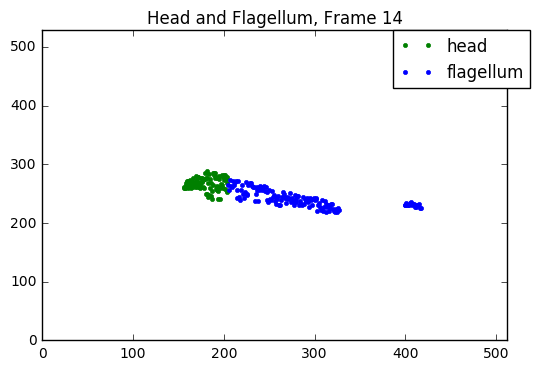

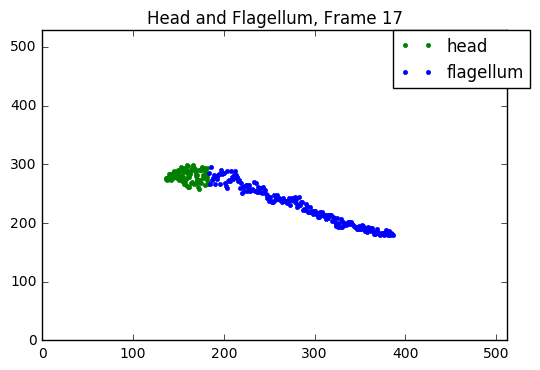

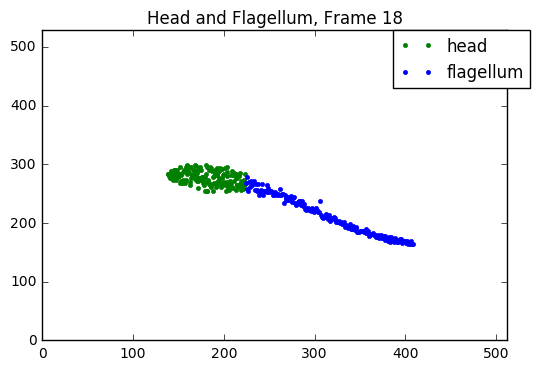

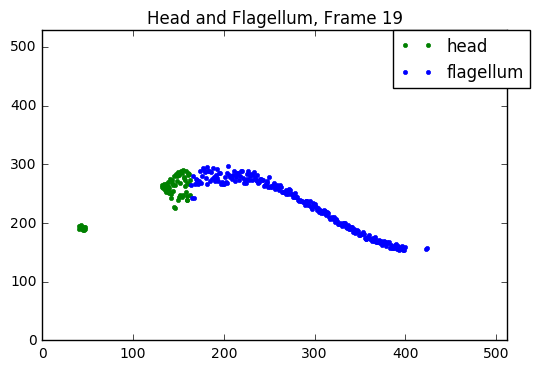

In [8]:
for k in range(n3):
    if k in Frame:
        plt.figure()
        head = Head[0,k].astype(int)
        flagellum = Flagellum[0,k].astype(int)
        plt.plot(head[:,1], head[:,0], "g.", label="head")
        plt.plot(flagellum[:,1], flagellum[:,0], "b.", label="flagellum")
        x1,x2,y1,y2 = plt.axis()
        plt.axis((0,n2,0,n1))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
        plt.title("Head and Flagellum, Frame "+str(k))
        plt.show()
    # end of if ( k in Frame ) loop on
# end of for loop on k

## 5.3 Plot the head in all frames into one figure.

In [9]:
# Center of the head
x = []
y = []
for k in range(0,n3):
    if k in Frame:
        head = Head[0,k].astype(int)
        # Compute the center of the head.
        y.append( np.mean(head[:,0]) )
        x.append( np.mean(head[:,1]) )

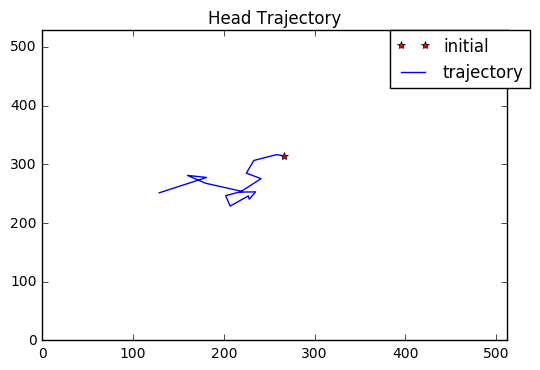

In [10]:
plt.figure()
plt.plot(x[0], y[0], "r*", label="initial")
plt.plot(x, y, "b-", label="trajectory")
x1,x2,y1,y2 = plt.axis()
plt.axis((0,n2,0,n1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.title("Head Trajectory")
plt.show()

In [11]:
plt.figure()
plt.plot(x[0], y[0], "r*", label="initial")
plt.plot(x, y, "b-", label="trajectory")
x1,x2,y1,y2 = plt.axis()
plt.axis((0,n2,0,n1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.title("Head Trajectory")
plt.savefig( "HeadTrajectory.png" )

## 5.4 Conclusion.
Separating head and flagellum
- Advantage: This algorithm is relatively simple.
- Disadvantage: As discussed in Step04, this algorithm relies on the fact that a decent amount of flagellum is segmented and the fact that the segmentation result is almost perfect for the head. This algorithm is too simple to obtain a high accuracy.